Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [1]:
NAME = "Andrew Wolfe"
COLLABORATORS = ""

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


# Analysis and Code

In [2]:
#import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


titanic_data = pd.read_csv("train.csv")

#Check out the dataset 
titanic_data.head()

#From Data Dictionary 
# Survived: 1 = Survived, 0 = died 
# Pclass: 1 = Upper, 2 = Middle, 3 = Lower 
# SibSp: Number of siblings/spouses aboard the Titanic
#        Sibling = brother, sister, stepbrother, stepsister
#        Spouse = husband, wife (mistresses and fiancés were ignored)
# Parch: Number of parents/children aboard the Titanic
#       Parent = mother, father
#       Child = daughter, son, stepdaughter, stepson
#       Some children travelled only with a nanny, therefore parch=0 for them.
# Cabin: Cabin Number 
# Embarked: Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Identify and remove duplicate entries
titanic_data_duplicates = titanic_data.duplicated()
print(titanic_data_duplicates.sum())

0


No duplicates within the dataset which is good

In [5]:
#Remove columns that won't provide any value to our analysis 
titanic_data = titanic_data.drop(['PassengerId','Name','Ticket','Fare','Cabin'],1)

titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [6]:
#Transform data into a more reader friendly format 
titanic_data.Survived.replace([1,0],['survived','died'], inplace=True)
titanic_data.Pclass.replace([1,2,3],['Upper','Middle','Lower'], inplace=True)
titanic_data.Embarked.replace(['C','S','Q'],['Cherbourg','Southampton','Queenstown'], inplace=True)

titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,died,Lower,male,22.0,1,0,Southampton
1,survived,Upper,female,38.0,1,0,Cherbourg
2,survived,Lower,female,26.0,0,0,Southampton
3,survived,Upper,female,35.0,1,0,Southampton
4,died,Lower,male,35.0,0,0,Southampton


In [7]:
#Now data is setup, get counts of different categories
numPassengers = len(titanic_data)
numSurvivors = len(titanic_data[titanic_data.Survived=='survived'])
numDied = len(titanic_data[titanic_data.Survived=='died'])

print("Total number of passenegers", numPassengers)
print("% of passengers who survived", (numSurvivors/numPassengers))
print("% of passengers who died", (numDied/numPassengers))

Total number of passenegers 891
% of passengers who survived 0.3838383838383838
% of passengers who died 0.6161616161616161


We now know that out of 891 total passengers, roughly 61.6% died while the other 38.4% survived

In [8]:
#Split by Gender
pd.crosstab(titanic_data['Survived'],titanic_data['Sex'])

Sex,female,male
Survived,,
died,81,468
survived,233,109


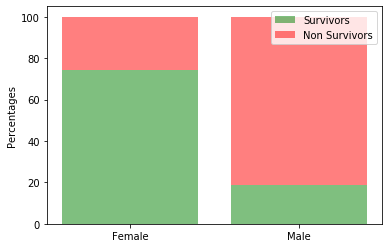

In [9]:
#Graph the above results by percentages
surGender = titanic_data[titanic_data.Survived=='survived'].groupby(['Sex']).size().values
diedGender = titanic_data[titanic_data.Survived=='died'].groupby(['Sex']).size().values
totals = surGender + diedGender

surPercentages = (surGender / totals)*100
diedPercentages = (diedGender / totals)*100

plt.bar(range(len(surPercentages)), surPercentages, label='Survivors',alpha=0.5, color='g')
plt.bar(range(len(diedPercentages)), diedPercentages, label='Non Survivors',bottom=surPercentages, alpha=0.5, color='r')
plt.xticks([0.0, 1.0],['Female','Male'])
plt.ylabel("Percentages")
plt.legend()
plt.show()
                                                                 

The above chart shows that Female's had a better chance at surviving than males 

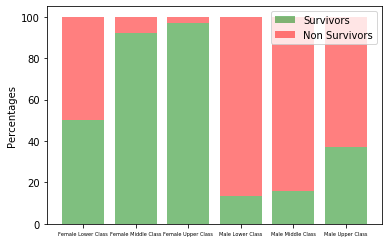

In [10]:
#Now lets take a look at the results by gender and class
surClass = titanic_data[titanic_data.Survived=='survived'].groupby(['Sex','Pclass']).size().values
diedClass = titanic_data[titanic_data.Survived=='died'].groupby(['Sex','Pclass']).size().values
totals = surClass + diedClass

surPercentages = (surClass / totals)*100
diedPercentages = (diedClass / totals)*100

plt.bar(range(len(surPercentages)), surPercentages, label='Survivors',alpha=0.5, color='g')
plt.bar(range(len(diedPercentages)), diedPercentages, label='Non Survivors',bottom=surPercentages, alpha=0.5, color='r')
plt.xticks([0,1,2,3,4,5],['Female Lower Class','Female Middle Class','Female Upper Class','Male Lower Class','Male Middle Class','Male Upper Class'],fontsize=5)
plt.ylabel("Percentages")
plt.legend()
plt.show()

The above shows the breakdown of survivor rate by sex and class. 
The results show that the categories in which have the passengers of the titanic had the best chances of surviving were. 
1. Female Upper Class
2. Female Middle Class
3. Female Lower Class
4. Male Upper Class
5. Male Middle Class
6. Male Lower Class

# Answers to Questions 

**Question 1**
    
Females who were part of the upper class were the most likely to survive the Titanic disaster. 
See the above analysis and code for the logic behind it all. 

**Question 2**
    
Removed/dropped some of the attributes (PassengerId, Name, Ticket, Fare, Cabin) as they didn't really help us to differentiate between the different types of passengers which were on the Titanic. They also contained too many distinct values for a simple analysis. 
    
Attributes that were used in the end were Survived, Pclass, and Sex. 

**Question 3**

    
As I wanted to get a better sense of the counts behind how many passengers survived / died by the different classifications (sex, pclass), some new attributes were created. These were around the counts and percentage breakdowns of the above (sex, and pclass). 

Below were the attributes that were excluded from the analysis and reasons why 
- PassengerId: Distinct id to help identify the passengers, not required when we are grouping attributes by counts
- Name: Not relevant to our analysis, too many unique values and it didn't make sense to categorize survivorship rate by name
- Ticket: Distinct id of the ticker which was purchased, similar to PassengerID, too many unique values and not relevant to categorizing passengers
- Fare: Simialr to ticket in reasons in which why it was removed
- Cabin: Not relevant to our analysis, cabin id will not help us to categorize the passengers by more generic groupings 

**Question 4**

Did not treat any missing values for the categories of the attributes that I was analyzing as it wasn't required. 